In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale = 2)
%matplotlib inline


In [2]:
import os
path = r'D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\covid-19-20200122-1011.zip
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\DonaldTrump.zip
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\imdb_movies.csv
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\income.csv
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\ml-100k.zip
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\movie_douban.zip
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\shopping.csv
D:\Desktop\武大\专业课\python\Python期末实验报告\Python课程项目-数据分析用数据集-202204\安居客租房信息.xlsx


In [3]:
files = os.listdir(path)


# 1. imdb-4：参演电影类型最多的3位演员（难）

In [38]:

data_imdb = pd.read_csv(os.path.join(path, files[2])).set_index("Title")

data_imdb

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [39]:
data_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [40]:
data_imdb.loc[:, "Genre"] = data_imdb["Genre"].str.split(r",\s*")
data_imdb.loc[:, "Actors"] = data_imdb["Actors"].str.split(r",\s*")


In [41]:
genres_all = [elements for lst in data_imdb["Genre"] for elements in lst]
actors_all = [elements for lst in data_imdb["Actors"] for elements in lst]

genres = list(set(genres_all))
actors = list(set(actors_all))



In [43]:
# df_movie_genre = pd.DataFrame(
#     index= data_imdb.index,
#     columns= genres,
# )
# df_movie_genre = df_movie_genre.fillna(False)

# df_movie_actor = pd.DataFrame(
#     index= data_imdb.index,
#     columns= actors,
# )
# df_movie_actor = df_movie_actor.fillna(False)


In [44]:

# for movie in data_imdb.index:
#     for genre in data_imdb.loc[movie, "Genre"]:
#         df_movie_genre.loc[movie, genre] = True
    
#     for actor in data_imdb.loc[movie, "Actors"]:
#         df_movie_actor.loc[movie, actor] = True
    

In [45]:
# Count all the genres of each actor using a new df
df = pd.DataFrame(index=actors, columns=genres)
df = df.fillna(False)

In [46]:
for item, row in data_imdb[["Actors", "Genre"]].iterrows():
    for actor in row[0]:
        for genre in row[1]:
            df.loc[actor, genre] = True
            

<AxesSubplot:xlabel='number'>

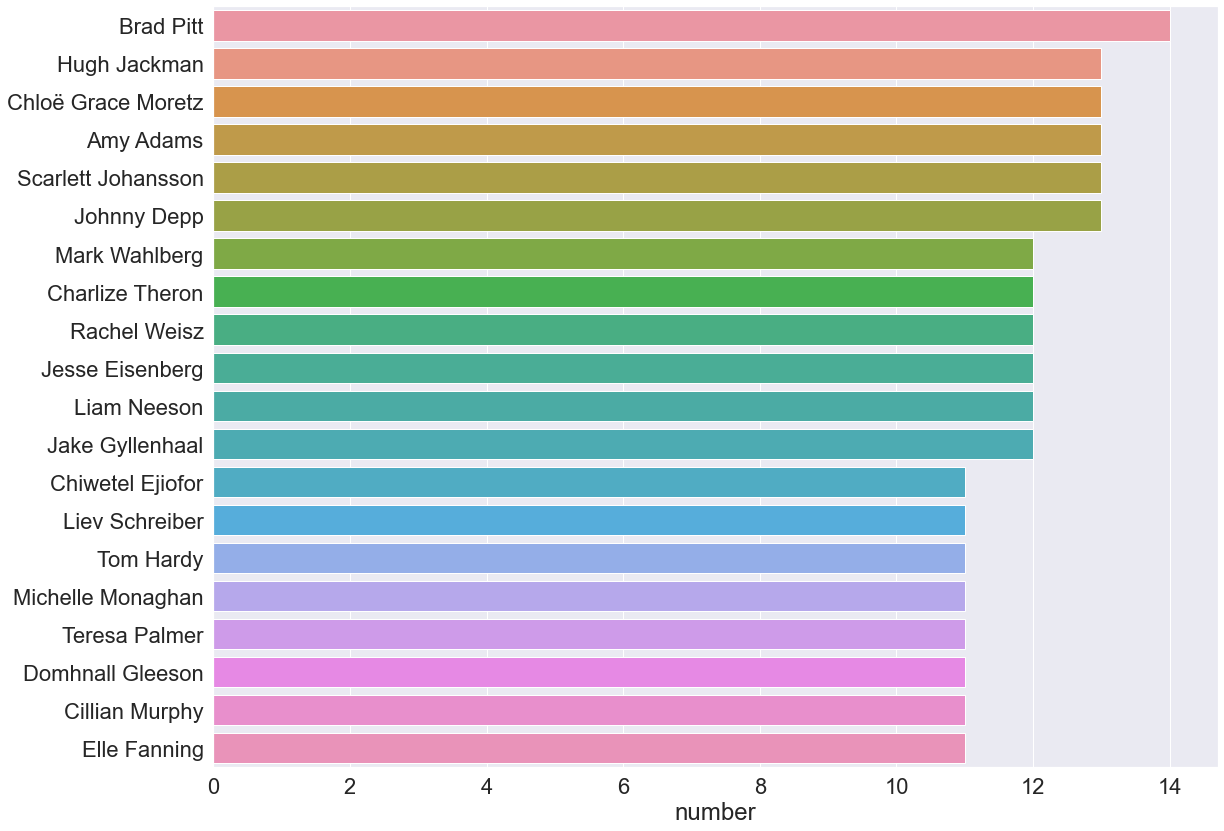

In [47]:
plt.figure(figsize=(18,14))
a = pd.DataFrame(df.sum(axis=1).nlargest(20), columns=["number"])
sns.barplot(data=a, y=a.index, x="number")

由此可见，B.P.第一，下面5个人并列2名

In [48]:
top_actors = [actor for actor in a.nlargest(6, "number").index]
top_actors

['Brad Pitt',
 'Hugh Jackman',
 'Chloë Grace Moretz',
 'Amy Adams',
 'Scarlett Johansson',
 'Johnny Depp']

# 2. 证明“受教育程度越高收入就越高”

In [33]:
data_income = pd.read_table(os.path.join(path, files[3]), sep=',\s*', engine="python")
data_income.fillna(0)
data_income.head()

,age,work,fnlwgt,edu,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
data_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work            32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   edu             32561 non-null  object
 4   edu_num         32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
cat_degrees = data_income[["edu", "edu_num"]].sort_values(['edu_num'])["edu"].unique()
cat_degrees

array(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
       '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
       'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
      dtype=object)

In [36]:
from pandas.api.types import CategoricalDtype
cat_degrees_order = CategoricalDtype(
    cat_degrees,
    ordered=True
)

data_income["edu"] = data_income["edu"].astype(cat_degrees_order)

In [37]:
data_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   work            32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   edu             32561 non-null  category
 4   edu_num         32561 non-null  int64   
 5   marital_status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital_gain    32561 non-null  int64   
 11  capital_loss    32561 non-null  int64   
 12  hours_per_week  32561 non-null  int64   
 13  country         32561 non-null  object  
 14  income          32561 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


In [38]:
df_edu_icm = data_income.groupby(["edu"])['income'].value_counts(normalize=True).unstack() #顺便标准化
df_edu_icm

income,<=50K,>50K
edu,,
Preschool,1.000000,NaN
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
HS-grad,0.840491,0.159509


<AxesSubplot:xlabel='income', ylabel='edu'>

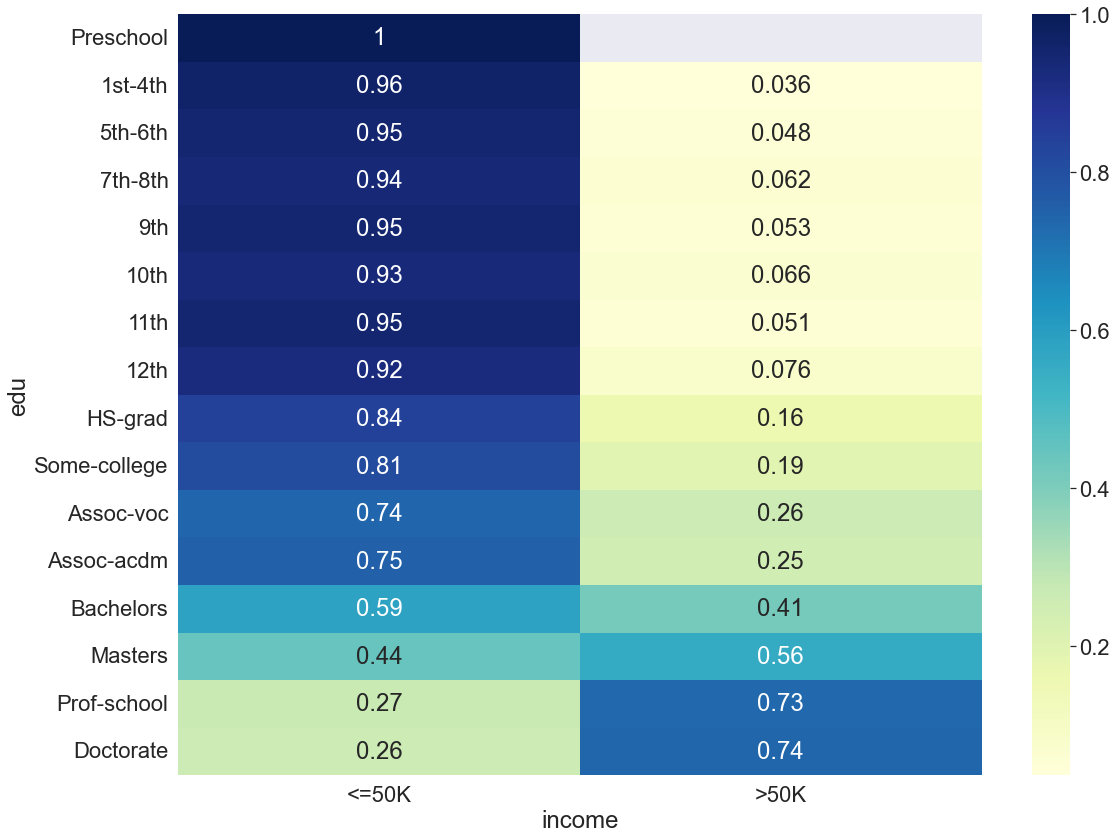

In [39]:
plt.figure(figsize=(18,14))
# sns.set(font_scale = 2)
sns.heatmap(df_edu_icm, annot=True, cmap="YlGnBu")

由此可见， 在硕士学位以下，收入<=50k居多。在硕士学位以上，收入>50k居多。所以受教育程度越高，越高收入就越高

# 3. shopping-2：不同年龄性别人群的消费能力（适中）


In [40]:
data_shopping = pd.read_csv(os.path.join(path, files[6]))
data_shopping.sample(10)

,卡号,消费额,付款方式,性别,年龄,物品
593,57952,35.1487,CHEQUE,F,48,蔬菜罐头
1416,55992,17.2856,CASH,M,30,鱼类
1147,79039,12.4456,CARD,M,46,乳制品
2174,81851,13.9837,CARD,F,19,糖果
632,16220,34.7872,CHEQUE,M,33,蔬菜罐头
463,83536,31.9368,CASH,F,22,鱼类
114,28314,38.8062,CARD,F,37,冻肉
1059,68058,49.8863,CASH,F,22,乳制品
1048,95026,13.4226,CASH,F,29,乳制品
2543,94754,45.0857,CASH,F,41,软饮料


In [41]:
data_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   卡号      2800 non-null   int64  
 1   消费额     2800 non-null   float64
 2   付款方式    2800 non-null   object 
 3   性别      2800 non-null   object 
 4   年龄      2800 non-null   int64  
 5   物品      2800 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 131.4+ KB


In [42]:
data_shopping["年龄"].max()


50

In [43]:
data_shopping["年龄"].min()

16

In [44]:
age = pd.cut(data_shopping["年龄"], bins=range(15, 55, 5))
data_stat = data_shopping.pivot_table("消费额", ["性别", age]).unstack()
data_stat

消费额                                                         \
年龄   (15, 20]   (20, 25]   (25, 30]   (30, 35]   (35, 40]   (40, 45]   
性别                                                                     
F   30.494822  27.446181  32.630143  32.177966  31.508085  31.392592   
M   29.456312  29.843704  31.461581  32.448644  28.851136  26.647117   

               
年龄   (45, 50]  
性别             
F   29.176097  
M   29.589289

<AxesSubplot:xlabel='年龄', ylabel='消费额'>

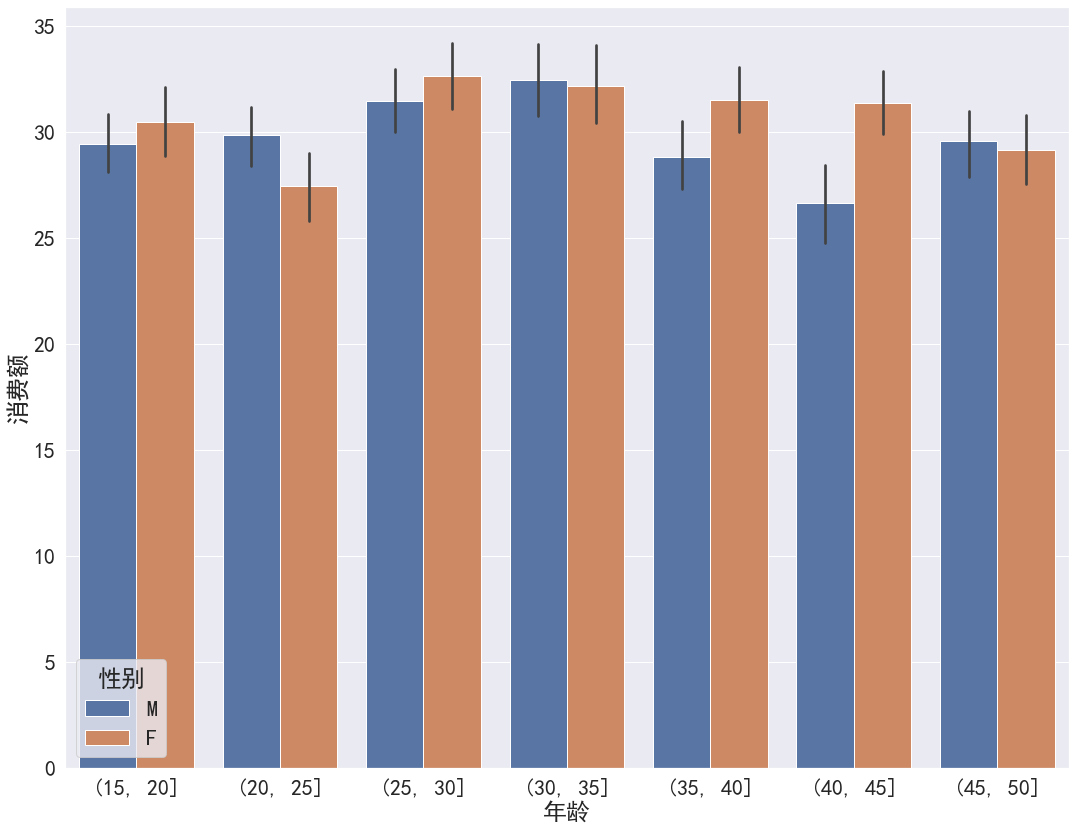

In [46]:
sns.set(context='notebook', font='SimHei', font_scale=2)
plt.figure(figsize=(18,14))
sns.barplot(x=age, y="消费额", hue="性别", data=data_shopping)

由此可见格年龄段性别消费能力

# 4. 考察安居客数据中，租金与房屋面积、地区的关系

In [47]:
data_ajk = pd.read_excel(os.path.join(path, files[-1]))
data_ajk.sample(10)

,标题,户型,户型1,房屋面积,楼层,小区,租赁类型,朝向,轨道交通,租金,地区
741,一室一厅采光好，随时入住，有钥匙欢迎看房，居家好房近7/8号,1室,1厅,38平米,3/6层,上南四村,整租,朝南,6/7/8号线,3700,pudong安居客
3816,家具家电全齐 拎包即住 新房装修出租 先到先得,3室,1厅,18平米,17/20层,美晶佳园,整租,东南,1/3/4/11号线,1380,xuhui安居客
3762,楼下就是大商场，小区出门就是地铁口，不选择蛋壳，我怕你后悔哦,1室,1厅,26平米,19/26层,新梅绿岛苑,整租,东南,1号线,2250,baoshan安居客
1418,阳光自在空间 宽敞自我天地 妆点雅致生活,3室,1厅,20平米,5/21层,西郊紫郡,整租,东南,无,1900,qingpu安居客
3008,馨佳园十街坊 3室1厅 114平米 精装修 靠近刘行地铁,3室,1厅,114平米,9/18层,馨佳园十街坊,整租,南北,7号线,3800,baoshan安居客
1551,浦江南北通透 采光好 地段 环境优美 交通便利 方便出行,1室,1厅,26平米,13/32层,景江苑A区,整租,东南,无,2210,minhang安居客
5818,三林瑞康苑 3室1厅90平米 精装修 押一付三,3室,1厅,90平米,8/30层,瑞康苑,整租,南北,8号线,4500,pudong安居客
1024,江桥大宅风范城近地铁站小区，精装舒适，在这里遇见更多新朋友,3室,1厅,19平米,26/28层,大宅风范城,合租,东南,13号线,1190,jiading安居客
2620,入住减免2300 别和好房擦肩而过 享受居住乐趣,3室,1厅,22平米,21/27层,明园村小区,整租,东南,12号线,1590,yangpu安居客
1035,小区房源，安静舒适家具齐全，服务周到，住得放心,1室,1厅,35平米,13/26层,嘉怡坊,整租,东南,无,2690,jiading安居客


In [48]:
data_ajk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7180 entries, 0 to 7179
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   标题      7180 non-null   object
 1   户型      7180 non-null   object
 2   户型1     7180 non-null   object
 3   房屋面积    7180 non-null   object
 4   楼层      7180 non-null   object
 5   小区      7171 non-null   object
 6   租赁类型    7180 non-null   object
 7   朝向      7180 non-null   object
 8   轨道交通    7180 non-null   object
 9   租金      7180 non-null   int64 
 10  地区      7180 non-null   object
dtypes: int64(1), object(10)
memory usage: 617.2+ KB


In [49]:
data_ajk["房屋面积"] = data_ajk["房屋面积"].map(lambda string: int(string[:-2]))
data_ajk["地区"] = data_ajk["地区"].map(lambda string: string[:-3])

In [79]:
data_ajk["租金"].mean()

4258.550139275766

In [51]:
data_ajk["房屋面积"].max()

2000

In [52]:
data_ajk["房屋面积"].min()

7

In [74]:
area = pd.cut(data_ajk["房屋面积"], bins=range(0, 2050, 50))

In [75]:
tmp = pd.pivot_table(data_ajk, "租金", area,  ["地区"], aggfunc=np.max).fillna(0) # 由于担心取平均的时候会因为nan而丢失数据，所以取最大值代表租金
tmp

地区,baoshan,changning,hongkou,huangpu,jiading,minhang,pudong,putuo,qingpu,songjiang,xuhui,yangpu
房屋面积,,,,,,,,,,,,
"(0, 50]",4200.0,6800.0,5200.0,7300.0,4200.0,4300.0,6000.0,6000.0,4800.0,4800.0,5300.0,7500.0
"(50, 100]",6800.0,15000.0,10000.0,15000.0,6000.0,16000.0,13500.0,12000.0,8800.0,6000.0,10500.0,11000.0
"(100, 150]",10000.0,27000.0,12500.0,31000.0,6500.0,15000.0,30000.0,17000.0,11000.0,9800.0,25000.0,15000.0
"(150, 200]",0.0,35000.0,20500.0,37000.0,0.0,25000.0,22000.0,12500.0,17000.0,6500.0,32000.0,23000.0
"(200, 250]",0.0,38000.0,28000.0,52000.0,0.0,28000.0,35000.0,28000.0,25000.0,8000.0,23900.0,0.0
"(250, 300]",13000.0,60000.0,20000.0,85000.0,0.0,32000.0,60000.0,30000.0,23000.0,11000.0,39800.0,0.0
"(300, 350]",0.0,48000.0,0.0,68000.0,0.0,23000.0,50000.0,0.0,30000.0,12000.0,0.0,0.0
"(350, 400]",0.0,0.0,0.0,28000.0,0.0,42000.0,58000.0,0.0,45000.0,0.0,20000.0,0.0
"(400, 450]",0.0,60000.0,0.0,0.0,0.0,0.0,55000.0,0.0,33000.0,0.0,0.0,0.0


<AxesSubplot:xlabel='地区', ylabel='房屋面积'>

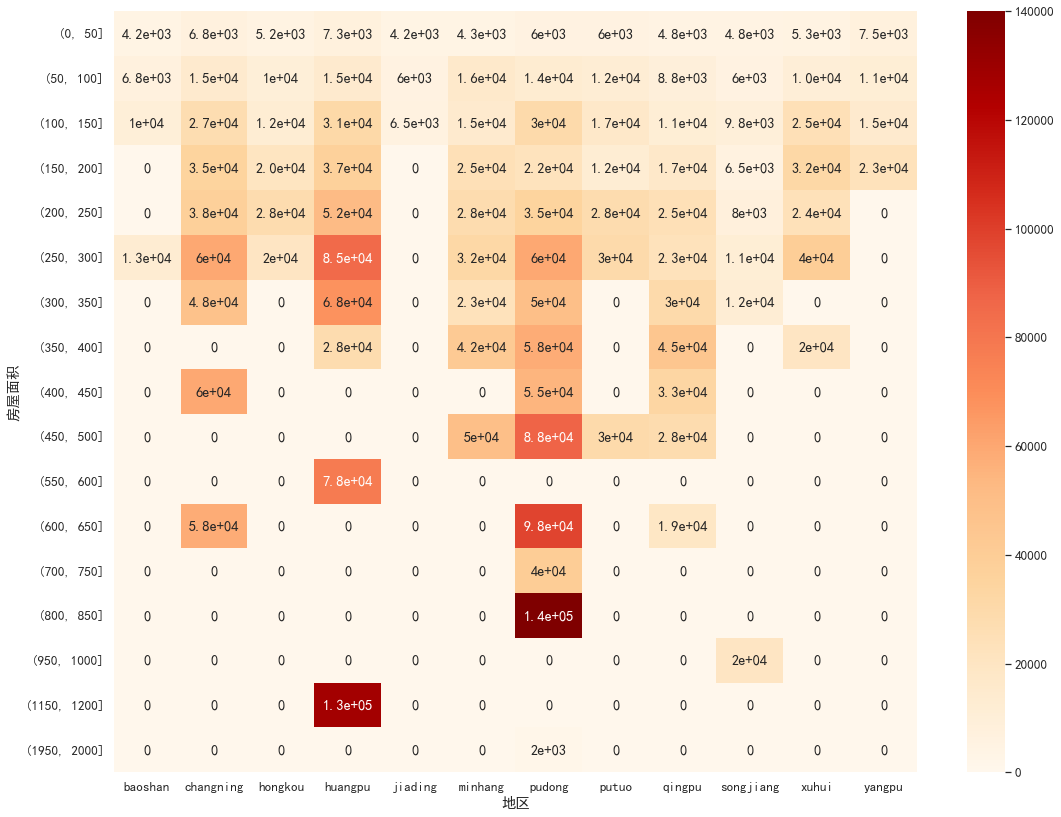

In [89]:
plt.figure(figsize=(18,14))
sns.set(font_scale=1.2, font="Simhei")
sns.heatmap(tmp, annot=True, cmap="OrRd")
# sns.barplot(y=area, x="租金", hue="地区", data=data_ajk)